In [1]:
%matplotlib inline
import time
import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
import keras
from keras.optimizers import SGD
#from keras.layers import Embedding
#from keras.layers import LSTM
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime, date

Using TensorFlow backend.


# From Keras documents -------------------------------------------------

# - Random number generated sample data -

# Multilayer Perceptron (MLP) for multi-class softmax classification:
https://keras.io/getting-started/sequential-model-guide/

```keras
Dense
```

- Input shape
- nD tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).
- Output shape
- nD tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape  (batch_size, input_dim), the output would have shape (batch_size, units).

In [88]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
#from keras.utils import np_utils

In [89]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
#model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [90]:
# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [91]:
print(x_train.shape,y_train.shape)
print(x_train[:1])
print(y_train[:5])

(1000, 20) (1000, 10)
[[ 0.48518829  0.47947825  0.99470233  0.85608792  0.48910703  0.60772682
   0.96440016  0.00917515  0.67415296  0.52454188  0.15985524  0.94604366
   0.96550388  0.39653662  0.27099998  0.06742442  0.90426836  0.28017702
   0.60453299  0.74505497]]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [92]:
model.fit(x_train, y_train,epochs=1,batch_size=1,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=1)

C:\Users\moriya\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


 63/100 [=================>............] - ETA: 0s 

# VGG-like convnet:
https://keras.io/getting-started/sequential-model-guide/

In [93]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [94]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=( 100,100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
# model.summary()

In [95]:
# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)
print(x_train.shape,y_train.shape)
#x_train[:1]

(100, 100, 100, 3) (100, 10)


In [96]:
model.fit(x_train, y_train, batch_size=32, epochs=1)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/1
20/20 [==============================] - 0s


# Sequence classification with LSTM:
https://keras.io/getting-started/sequential-model-guide/

- Input shapes
- 3D tensor with shape (batch_size, timesteps, input_dim), (Optional) 2D tensors with shape  (batch_size, output_dim).
- Output shape
- if return_state: a list of tensors. The first tensor is the output. The remaining tensors are the last states, each with shape  (batch_size, units).
- if return_sequences: 3D tensor with shape  (batch_size, timesteps, units).
- else, 2D tensor with shape (batch_size, units).

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

In [98]:
model = Sequential()
#model.add(Embedding(max_features, output_dim=256))
#model.add(Embedding(input_dim=1,output_dim=256))
#model.add(LSTM(128))
model.add(LSTM(input_shape=(None,1),units=50))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_40 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [99]:
x_train = np.random.random((100,50,1))
y_train = np.random.random((100))
print(x_train.shape,y_train.shape)
model.fit(x_train, y_train, batch_size=1, epochs=1)
#score = model.evaluate(x_test, y_test, batch_size=16)

(100, 50, 1) (100,)
Epoch 1/1
100/100 [==============================] - 3s - loss: 0.6958 - acc: 0.0000e+00     


# Sequence classification with 1D convolutions:
https://keras.io/getting-started/sequential-model-guide/

- Input shape
- 3D tensor with shape: (batch_size, steps, input_dim)
- Output shape
- 3D tensor with shape: (batch_size, new_steps, filters) steps value might have changed due to padding or strides.

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [101]:
seq_length=3
model = Sequential()
#model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu', input_shape=(50,1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [102]:
# Generate dummy data
x_train = np.random.random(( 100, 50, 1))
y_train = np.random.random((100))
x_test = np.random.random(( 100, 50, 1))
y_test = np.random.random((100))
print(x_train.shape,y_train.shape)
model.fit(x_train, y_train, batch_size=10, epochs=100,verbose=0)
score = model.evaluate(x_test, y_test, batch_size=1)

(100, 50, 1) (100,)
 66/100 [==================>...........] - ETA: 0s

# - S&P 500 historical data -------------------------------------------

In [2]:
#Step 1 Load Data
tsd0 = web.DataReader("SPY","google","1990/1/1")
tsd = tsd0.Close.values

In [3]:
def prepare_data(data, time_window,shuffling):
    data_length = time_window + 1
    data_div = []
    for index in range(len(data) - data_length):#データをdata_lengthの長さに分割する
        data_div.append(data[index: index + data_length])
    n_data = []
    for w in data_div:
        n_window = [((float(ww) / float(w[0])-1)) for ww in w]#価格データを初期価格で基準化しリターンの形に変更している。
        #n_window = [((float(ww))) for ww in w]
        n_data.append(n_window)
    data_div = np.array(n_data)

    row = round(0.9 * data_div.shape[0])#最初の90%を訓練データに、後の10%をテストデータに分割している。
    train = data_div[:int(row), :]#
    if shuffling:
        np.random.shuffle(train)
    x_train = train[:, :-1]#train(全データ数、time_window数)
    y_train = train[:, -1]
    x_test = data_div[int(row):, :-1]#train(全データ数、time_window-1数)
    y_test = data_div[int(row):, -1]#train(全データ数、1)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

In [186]:
#Step 2 
time_window=20
pred_window=10
X_train, Y_train, X_test, Y_test = prepare_data(tsd, time_window,False)
print('no. of all data',len(tsd))
print('no. of train data X',len(X_train),'y',len(Y_train))
print('no. of test data X',len(X_test),'y', len(Y_test))
print(X_train.shape,Y_train.shape)

no. of all data 4000
no. of train data X 3581 y 3581
no. of test data X 398 y 398
(3581, 20, 1) (3581,)


#### predict

- predict(self, x, batch_size=32, verbose=0)
- Generates output predictions for the input samples.
- Computation is done in batches.

In [145]:
def predict_time_series_data(model, data, time_window, pred_window):
    #Predict sequence of pred_window steps before shifting prediction run forward by pred_window steps
    pred_seqs = []
    error=0
    error2=0
    for i in range(int(len(data)/pred_window)):
        curr_frame = data[i*pred_window]
        predicted = []
        for j in range(pred_window):
            pred=(model.predict(curr_frame[newaxis,:,:])[0,0])
            predicted.append(pred)
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [time_window-1], predicted[-1], axis=0)
            error+=(pred-data[i][j])**2
            error2+=(data[i][j]-data[i][j-1])**2
        pred_seqs.append(predicted)
    return pred_seqs,error,error2
#------------------------------------------------------------------------------------

# Multilayer Perceptron (MLP) for multi-class softmax classification:

In [161]:
start_time=datetime.now()
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(time_window,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse',optimizer="sgd",metrics=['mae'])

XX_train=X_train.reshape(X_train.shape[0],time_window)
XX_test=X_test.reshape(X_test.shape[0],time_window)

model.fit(XX_train, Y_train,epochs=100,batch_size=1,verbose=0)
#score = model.evaluate(x_test, y_test, batch_size=1)
print(datetime.now()-start_time)

0:09:24.675890


0.22130159026 0.181410333253
0.11065079513 0.0907051666266


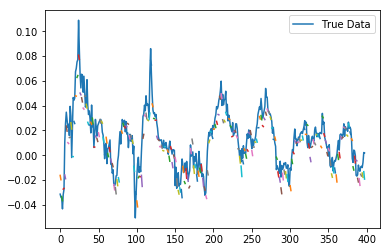

In [162]:
# prediction
pred_window=2#pred_window
time_window=time_window

data=XX_test
pred_seqs = []
error=0
error2=0
for i in range(int(len(data)/pred_window)):
    curr_frame = data[i*pred_window]
    predicted = []
    for j in range(pred_window):
        pred=(model.predict(curr_frame[None,:,])[0,0])
        predicted.append(pred)
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [time_window-1], predicted[-1], axis=0)
        error+=(pred-data[i][j])**2
        error2+=(data[i][j]-data[i][j-1])**2
    pred_seqs.append(predicted)
predictions=pred_seqs


print(error,error2)
print(error/pred_window,error2/pred_window)
#SPlot the prediction!
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_test, label='True Data')
plt.legend()
for i, data in enumerate(predictions):
    padding = [None for p in range(i * pred_window)]
    plt.plot(padding + data)
plt.show()

# VGG-like convnet:

# Sequence classification with LSTM:


In [189]:
model = Sequential()

model.add(LSTM(input_shape=(None,1),units=64,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop',metrics=['mae'])
#model.summary()

In [190]:
start_time=datetime.now()
model.fit(X_train, Y_train, batch_size=1, epochs=100,verbose=0)
#score = model.evaluate(x_test, y_test, batch_size=16)
print(datetime.now()-start_time)

KeyboardInterrupt: 

In [ ]:
# prediction
pred_window=2#pred_window
time_window=time_window
predictions,error,error2 = predict_time_series_data(model, X_test, time_window,pred_window)
print(error,error2)
print(error/pred_window,error2/pred_window)

#SPlot the prediction!
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_test, label='True Data')
plt.legend()
for i, data in enumerate(predictions):
    padding = [None for p in range(i * pred_window)]
    plt.plot(padding + data)
plt.show()

# Sequence classification with 1D convolutions:


In [191]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(time_window,1)))
#model.add(MaxPooling1D(3))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])

In [194]:
start_time=datetime.now()
model.fit(X_train, Y_train, batch_size=1, epochs=100,verbose=0)
#score = model.evaluate(X_test, Y_test, batch_size=1)
print(datetime.now()-start_time)

0:08:12.253035


[ 0.26033866] [ 0.18141033]
[ 0.13016933] [ 0.09070517]


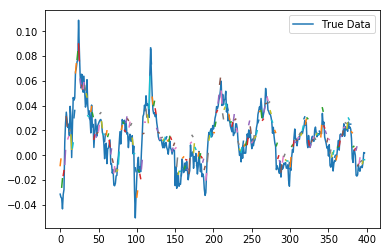

In [195]:
# prediction
pred_window=2#pred_window
time_window=time_window
predictions,error,error2 = predict_time_series_data(model, X_test, time_window,pred_window)
print(error,error2)
print(error/pred_window,error2/pred_window)

#SPlot the prediction!
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Y_test, label='True Data')
plt.legend()
for i, data in enumerate(predictions):
    padding = [None for p in range(i * pred_window)]
    plt.plot(padding + data)
plt.show()

# メモ ---------------------------------------------------------------------------
## 出力層の設計
一般的に、回帰問題では恒等関数を、分類問題ではソフトマックス関数を使う。

## Optimizer
### backprobagation(誤差逆伝播法)
### sgd(stochastic gradients descent:確率的勾配降下法)
- lr: float >= 0. Learning rate.
- momentum: float >= 0. Parameter updates momentum.
- decay: float >= 0. Learning rate decay over each update.
- nesterov: boolean. Whether to apply Nesterov momentum.

## Sequential
### evaluate

- evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)
- Computes the loss on some input data, batch by batch.

- Arguments

    - x: input data, as a Numpy array or list of Numpy arrays (if the model has multiple inputs).
    - y: labels, as a Numpy array.
    - batch_size: integer. Number of samples per gradient update.
    - verbose: verbosity mode, 0 or 1.
    - sample_weight: sample weights, as a Numpy array.
    
## numpy.random.randint(low, high=None, size=None, dtype='l')
Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

Parameters:	
- low : int
Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is one above the highest such integer).
- high : int, optional
If provided, one above the largest (signed) integer to be drawn from the distribution (see above for behavior if high=None).
- size : int or tuple of ints, optional
- Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
- dtype : dtype, optional
Desired dtype of the result. All dtypes are determined by their name, i.e., ‘int64’, ‘int’, etc, so byteorder is not available and a specific precision may have different C types depending on the platform. The default value is ‘np.int’.

- Returns:	
    - out : int or ndarray of ints
    - size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.

# Affineレイヤーと畳み込み層
全結合のューラルネットワークの最適化に用いられる順伝播法で行う行列の内積は、「アフィン変換」と呼ばれる。このような結合の仕方では、データの位置情報、形状、時間軸、空間情報などが失われてしまう。なぜなら、画像データのような縦28ピクセル、横28ピクセルから成る情報は、一列に並べられた784個のデータに変換されてしまうからである。全結合は出力の仕方を任意に決めることができる一方で、このような情報に潜む本質的なパターンが失われてしまう可能性がある。

畳み込み層は、この形状を維持できるという強みがある。